In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.6.0'

In [5]:
tf.keras.__version__

'2.6.0'

In [6]:
tf.config.list_physical_devices("GPU")

[]

In [7]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [9]:
mnist = tf.keras.datasets.mnist

In [10]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [11]:
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train_full[0].shape

(28, 28)

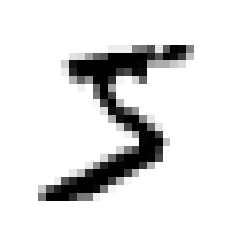

In [14]:
img = X_train_full[0]

plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

In [15]:
y_train_full.shape

(60000,)

In [16]:
y_train_full.shape

(60000,)

<AxesSubplot:>

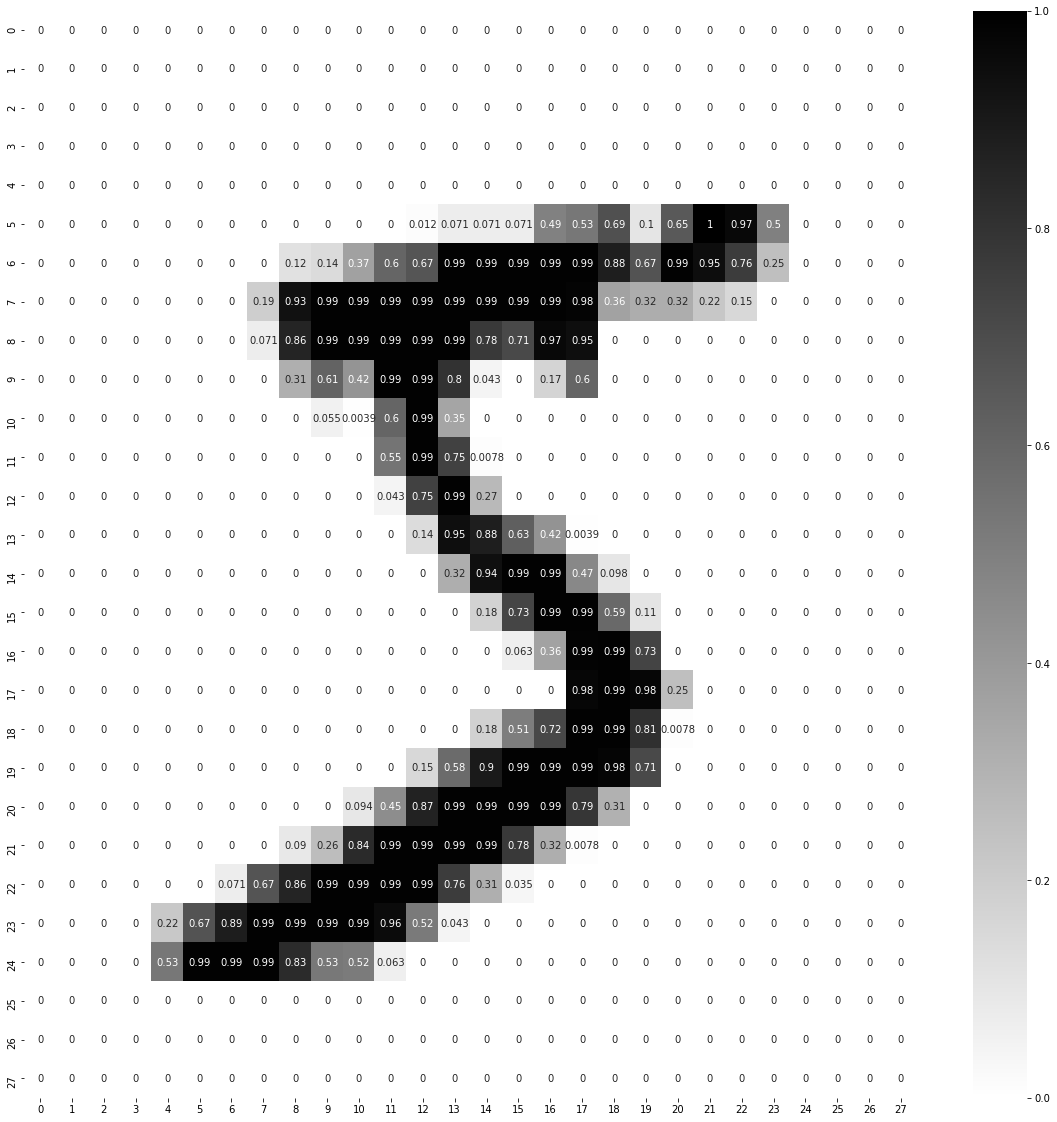

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="binary")

In [46]:
import time
def get_log_path(log_dir="log/fit"):
    uniquename= time.strftime("log_%Y_%m_%d_%H_%M_%S")
    logpath=os.path.join(log_dir,uniquename)
    print(f"saving logs at: {logpath}")
    return logpath
log_dir = get_log_path()

saving logs at: log/fit\log_2021_10_25_21_37_35


In [47]:
file_writer= tf.summary.create_file_writer(logdir=log_dir)

In [48]:
with file_writer.as_default():
    images=np.reshape(X_train[10:30],(-1,28,28,1))
    tf.summary.image("20 handwritten images",images,max_outputs=25, step=0)

In [49]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [56]:
%tensorboard --logdir log/fit

Reusing TensorBoard on port 6006 (pid 15328), started 0:18:38 ago. (Use '!kill 15328' to kill it.)

In [18]:
X_valid,X_train = X_train_full[0:5000]/255,X_train_full[5000:]/255
y_valid,y_train = y_train_full[0:5000]/255,y_train_full[5000:]/255

In [57]:
!pip install -U tensorboard-plugin-profile

In [19]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 943972602145012022
]


In [20]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer1"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
    tf.keras.layers.Dense(10,activation="softmax",name="outpuLayer")

]

In [21]:
model_clf=tf.keras.models.Sequential(LAYERS)

In [22]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outpuLayer (Dense)           (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
# firstlayer * secondlayer + bias

784*300 + 300, 300*100 + 100, 100*10 + 10

(235500, 30100, 1010)

In [24]:
np.sum((235500, 30100, 1010))

266610

In [25]:
weight,baises=model_clf.layers[1].get_weights()

In [26]:
weight.shape

(784, 300)

In [27]:
baises.shape

(300,)

In [28]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [51]:
tensorboard_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [52]:
#Early stopping callback
earlystopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [53]:
#Model chekpoint backup
CKPT_path="model_ckpt.h5"

checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [54]:
CALLBACK_LIST=[tensorboard_cb,earlystopping_cb,checkpoint_cb]

In [55]:
EPOCHS =30
VALIDATION =(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,validation_data=VALIDATION,epochs=EPOCHS,callbacks=CALLBACK_LIST)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.6351e-05 - accuracy: 0.0990 - val_loss: 1.3894e-05 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5804e-05 - accuracy: 0.0990 - val_loss: 1.3422e-05 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5291e-05 - accuracy: 0.0990 - val_loss: 1.2980e-05 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4811e-05 - accuracy: 0.0990 - val_loss: 1.2565e-05 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4359e-05 - accuracy: 0.0990 - val_loss: 1.2175e-05 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.3933e-05 - accuracy: 0.0990 - val_loss: 1.1809e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3532e-05 -

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.019116,0.098691,0.000623,0.0958
1,0.000440,0.098982,0.000285,0.0958
2,0.000243,0.098982,0.000181,0.0958
3,0.000167,0.098982,0.000131,0.0958
4,0.000127,0.098982,0.000103,0.0958
5,0.000102,0.098982,0.000084,0.0958
6,0.000085,0.098982,0.000071,0.0958
7,0.000073,0.098982,0.000061,0.0958
8,0.000064,0.098982,0.000054,0.0958
9,0.000057,0.098982,0.000048,0.0958


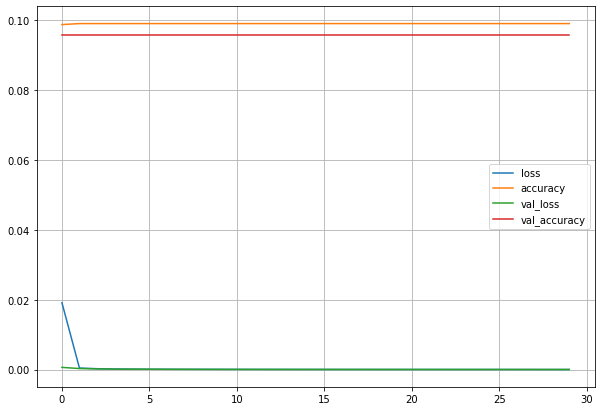

In [33]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

Object `vscode` not found.
